In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from symfit import Variable, Parameter, parameters, Fit, exp, pi, sqrt
from symfit.distributions import Gaussian
from symfit.core.models import CallableModel

from functools import reduce
from operator import add


In [2]:
df = pd.read_excel("peptide 24_42_4Cfolding_ppiA.xlsx", skiprows=[0, 1], header=[0])

df = df.dropna(how='any')
df.size
len(df.index)

755

In [3]:
df = pd.read_excel("peptide 24_42_4Cfolding_ppiA.xlsx", skiprows=[0, 1], header=[0])
df = df.dropna(how='any')

series_dict = {}
for i, col in enumerate(df):
    if i % 2 == 0:
        idx = df.iloc[:, i]
        data = df.iloc[:, i + 1]
        data.index = idx
        data /= np.trapz(data, data.index)

        series_dict[data.name] = data

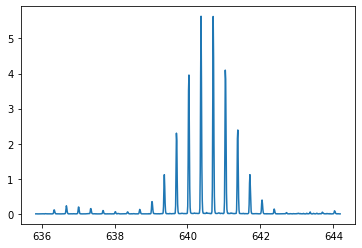

In [4]:
s = series_dict['fd_3']
fig, ax = plt.subplots()
ax.plot(s.index, s)


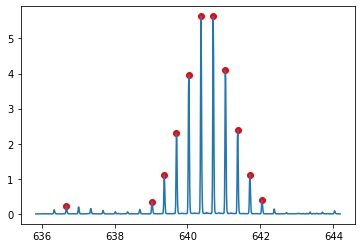

In [5]:
idx = find_peaks(s, prominence=0.2)[0]

xp = s.index.to_numpy()[idx]
yp = s.to_numpy()[idx]

fig, ax = plt.subplots()
ax.plot(s.index, s)
ax.scatter(xp, yp, color='r')

In [6]:
x_max = xp[np.argmax(yp)]
x_max

640.372

In [7]:
diffs = np.diff(xp).mean()
x_sig = 2*diffs

a = np.max(yp)

In [8]:
x_var = Variable('x')
y_var = Variable('y')
a_par, mu_par, sig_par = parameters('a mu sigma')
a_par.value = a
a_par.min = 0
mu_par.value = x_max
sig_par.value = x_sig

model = CallableModel({y_var: a_par*(exp(-(x_var - mu_par)**2/(2*sig_par**2)))})

fit = Fit(model, x=xp, y=yp)
fit_result = fit.execute()
print(fit_result)

Scalar Parameters:
Parameter | Value       | Standard Deviation
a           5.716152e+00  None
mu          6.405472e+02  None
sigma       6.317206e-01  None
Status message         b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Number of iterations   14
Objective              <symfit.core.objectives.LeastSquares object at 0x0000019B8CF90940>
Minimizer              <symfit.core.minimizers.LBFGSB object at 0x0000019B8D7B4278>

Goodness of fit qualifiers:
chi_squared            0.1551996378582881
objective_value        0.07759981892914405
r_squared              0.9963315811890807


In [9]:
x_vec = np.linspace(s.index.min(), s.index.max(), num=100, endpoint=True)
y_vec = model(x=x_vec, **fit_result.params)
y_vec[0][0]

5.124035549233123e-12

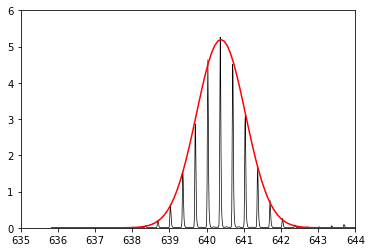

In [33]:
fig, ax = plt.subplots()
ax.plot(s.index, s, color ='k', linewidth=0.7)
#ax.scatter(xp, yp, color='r')
ax.plot(x_vec, y_vec[0],color='r')
ax.set_ylim(0,6)
ax.set_xlim(635,644)
plt.savefig('4C_FD.png')
